In [18]:
import os
import numpy as np
from os.path import exists

source = '/Users/HQ/orange/Reza/TF/NAR/'
p = '/14-two-sided-dummy-contacts/' # p for protocol
systems = sorted([i for i in os.listdir(source) if '.' not in i])
systems = ['1a74', '1azp', '1by4', '1bgb',  '2b0d', '1cdw', '1dh3', '1jj4', '1r4o', '1r4r', '1zme', '2dgc', '2r1j', '3cro', '1ysa', '2dgc']
os.chdir(source)
title = 'system density h-Interface h-PD h-Protein h-li'
populations_master = []
check = True
for system in systems[:]:
    populations = []
    if exists(system+p+'colors.npy') and exists(system+p+'contact-clusters-single-traj/DNA-PROT/summary') and exists(system+p+'contact-clusters-single-traj-pd/DNA-PROT/summary') and exists(system+p+'contact-clusters-single-traj-li/DNA-PROT/summary'):
    # if check:
    # if exists(source+p+'colors.npy'):
        populations.append(system+':')

        coencidences = np.load(source+system+'/14-two-sided-dummy-contacts/colors.npy')
        coencidences_top_20 = max(coencidences)*.8
        densities = np.load(source+system+'/14-two-sided-dummy-contacts/density.npy')
        frames = []
        for frame in range(len(coencidences)):
            if coencidences[frame] > coencidences_top_20 and densities[frame] > 0.8:
                frames.append(frame)
        populations.append(str(len(frames)/len(coencidences)).ljust(10))

        summary = open(system+'/'+p+'contact-clusters-single-traj/DNA-PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))
        summary = open(system+'/'+p+'contact-clusters-single-traj-pd/DNA-PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))
        summary = open(system+'/'+p+'contact-clusters-single-traj-pd/PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))
        summary = open(system+'/'+p+'contact-clusters-single-traj-li/DNA-PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))

        populations_master.append('  '.join(populations).rstrip())
    else:
        print(system)
    # populations_master.append(populations)

populations_master


1cdw
1dh3
1zme


['1a74:  0.1237      0.428,  0.404,  0.067,  0.044,  0.019          0.428,  0.422,  0.067,  0.044,  0.019          0.490,  0.422,  0.067,  0.011,  0.006          0.428,  0.422,  0.067,  0.044,  0.019',
 '1azp:  0.059       0.683,  0.237,  0.037,  0.030,  0.006          0.720,  0.237,  0.032,  0.008,  0.002          0.958,  0.042                                  0.720,  0.237,  0.030,  0.006,  0.003',
 '1by4:  0.0964      0.532,  0.297,  0.124,  0.027,  0.015          0.532,  0.297,  0.124,  0.027,  0.015          0.532,  0.297,  0.124,  0.027,  0.015          0.532,  0.297,  0.124,  0.027,  0.015',
 '1bgb:  0.1256      0.708,  0.092,  0.080,  0.076,  0.037          0.708,  0.092,  0.080,  0.076,  0.037          0.708,  0.092,  0.080,  0.076,  0.037          0.708,  0.092,  0.080,  0.076,  0.037',
 '2b0d:  0.0188      0.326,  0.244,  0.131,  0.109,  0.079          0.326,  0.244,  0.131,  0.113,  0.079          0.326,  0.244,  0.131,  0.113,  0.079          0.326,  0.244,  0.131,  0.113,

In [9]:
import os
import numpy as np
import pandas as pd
from os.path import exists

def find_lowest_RMSD(df):
    min = 500
    col = 0
    row = 0
    for i in range(1, len(df.columns)):
        for j in range(len(df[df.columns[i]])):
            if df[df.columns[i]][j] < min:
                min = df[df.columns[i]][j]
                col = i
                row = j
    # return [str(x).ljust(10) for x in [min, row, col-1]]
    return [str(x)[:4].ljust(5) for x in [min]]

source = '/Users/HQ/orange/Reza/TF/NAR/'
p = '/14-two-sided-dummy-contacts/' # p for protocol
systems = sorted([i for i in os.listdir(source) if '.' not in i])
systems = ['1a74', '1azp', '1by4', '1bgb',  '2b0d', '1cdw', '1dh3', '1jj4', '1r4o', '1r4r', '1zme', '2dgc', '2r1j', '3cro', '1ysa', '2dgc']
os.chdir(source)
# title = [i.ljust(45) for i in ['system', 'density', 'h-Interface', 'h-PD', 'h-Protein', 'h-li']]
# title = ['system'.ljust(7), 'density'.ljust(15), 'h-Interface'.ljust(45), 'h-PD'.ljust(45), 'h-Protein'.ljust(45), 'h-li'.ljust(45), 'lowest-pd, frame, replica'.ljust(30), 'lowest-pr, frame, replica'.ljust(30)]
title = ['system'.ljust(7), 'density'.ljust(15), 'h-Interface'.ljust(45), 'h-PD'.ljust(45), 'h-Protein'.ljust(45), 'h-li'.ljust(45), 'lowest-pd'.ljust(10), 'lowest-pr'.ljust(10), 'top5'.ljust(10), 'top5-pd'.ljust(10), 'top5-li'.ljust(10)]
populations_master = []
check = True
for system in systems[:]:
    populations = []
    if exists(system+p+'colors.npy') and exists(system+p+'contact-clusters-single-traj/DNA-PROT/summary') and exists(system+p+'contact-clusters-single-traj-pd/DNA-PROT/summary') and exists(system+p+'contact-clusters-single-traj-li/DNA-PROT/summary'):
    # if check:
    # if exists(source+p+'colors.npy'):
        populations.append(system+':')

        coencidences = np.load(source+system+'/14-two-sided-dummy-contacts/colors.npy')
        coencidences_top_20 = max(coencidences)*.8
        densities = np.load(source+system+'/14-two-sided-dummy-contacts/density.npy')
        frames = []
        for frame in range(len(coencidences)):
            if coencidences[frame] > coencidences_top_20 and densities[frame] > 0.8:
                frames.append(frame)
        populations.append(str(len(frames)/len(coencidences))[:5].ljust(10))

        summary = open(system+'/'+p+'contact-clusters-single-traj/DNA-PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))
        summary = open(system+'/'+p+'contact-clusters-single-traj-pd/DNA-PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))
        summary = open(system+'/'+p+'contact-clusters-single-traj-pd/PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))
        summary = open(system+'/'+p+'contact-clusters-single-traj-li/DNA-PROT/summary').readlines()
        population = [i.split()[2] for i in summary[:6]][1:]
        populations.append(',  '.join(population).ljust(45))

        df = pd.read_csv(system+'/'+p+'rmsd-pd.dat', delim_whitespace=True)
        populations.append(''.join(find_lowest_RMSD(df)).ljust(10))

        df = pd.read_csv(system+'/'+p+'rmsd-pr.dat', delim_whitespace=True)
        populations.append(''.join(find_lowest_RMSD(df)).ljust(10))

        df = pd.read_csv(system+'/'+p+'rmsd-top10.dat', delim_whitespace=True)
        df = df[:5]
        populations.append(''.join(find_lowest_RMSD(df)).ljust(10))

        df = pd.read_csv(system+'/'+p+'rmsd-top10-pd.dat', delim_whitespace=True)
        df = df[:5]
        populations.append(''.join(find_lowest_RMSD(df)).ljust(10))

        df = pd.read_csv(system+'/'+p+'rmsd-top10-li.dat', delim_whitespace=True)
        df = df[:5]
        populations.append(''.join(find_lowest_RMSD(df)).ljust(10))


        populations_master.append('  '.join(populations).rstrip())
    else:
        print(system)

with open('/Users/HQ/Library/Mobile Documents/com~apple~CloudDocs/Workzone/TF/populations.dat', 'w') as outfile:
    outfile.write(' '.join(title)+'\n')
    for i in populations_master:
        outfile.write(i+'\n')

In [8]:
df[:5]

,#Frame,top10-li
0,1,11.2730
1,2,9.4881
2,3,4.8136
3,4,9.3168
4,5,5.3070


(array([  17.,  144.,    8.,  107., 1025.,  350.,  124., 2845., 3713.,
        1665.]),
 array([0.19887249, 0.27898524, 0.35909799, 0.43921074, 0.51932349,
        0.59943624, 0.67954899, 0.75966175, 0.8397745 , 0.91988725,
        1.        ]),
 <BarContainer object of 10 artists>)

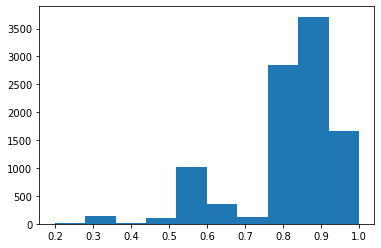

In [24]:
import matplotlib.pylab as plt
# plt.hist(coencidences)
plt.hist(densities)